<a href="https://colab.research.google.com/github/orhanaydinn/phishing_url_detection/blob/main/DPA_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Load Data

In [201]:
!pip install -q gdown
import gdown

file_id = "1TyUd-bgLbjgk5jf01UsWa6muAMPhjEHq"
url = f"https://drive.google.com/uc?id={file_id}"
output = "phishing_url_dataset.zip"

gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1TyUd-bgLbjgk5jf01UsWa6muAMPhjEHq
To: /content/phishing_url_datasetv2.zip
100%|██████████| 15.4M/15.4M [00:00<00:00, 24.4MB/s]


'phishing_url_datasetv2.zip'

In [202]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/phishing_url_dataset.zip"
extract_path = "/content/phishing_url_dataset"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset successfully extracted to:", extract_path)

Dataset successfully extracted to: /content/phishing_url_datasetv2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("/content/phishing_url_dataset/PhiUSIIL_Phishing_URL_Dataset.csv")

# 2 - Data Check

In [5]:
train_df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [7]:
train_df.head(10)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,0,1,35,1,11,86,0,14,1
6,23034.txt,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,32,4,14,44,2,17,1
7,696732.txt,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,24,2,22,36,0,15,1
8,739255.txt,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,...,0,0,1,71,4,9,40,1,317,1
9,14486.txt,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,...,0,0,1,10,1,12,173,6,65,1


In [8]:
train_df.tail(10)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235785,429092.txt,https://www.virginiakraljevic.com,32,www.virginiakraljevic.com,25,0,com,100.000000,1.000000,0.522907,...,1,0,1,4,9,12,17,1,1,1
235786,406164.txt,https://www.chilconference.org,29,www.chilconference.org,22,0,org,100.000000,1.000000,0.079963,...,0,0,1,2,7,15,30,7,3,1
235787,424795.txt,https://www.indirekter-freistoss.de,34,www.indirekter-freistoss.de,27,0,de,100.000000,0.550000,0.032650,...,0,0,0,3,6,12,320,0,348,1
235788,632917.txt,https://www.karibpan.com,23,www.karibpan.com,16,0,com,100.000000,1.000000,0.522907,...,1,0,1,21,3,22,31,0,8,1
235789,179093.txt,https://www.life-in-ecuador.com,30,www.life-in-ecuador.com,23,0,com,100.000000,0.533333,0.522907,...,0,0,1,43,1,16,42,0,44,1
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [9]:
train_df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

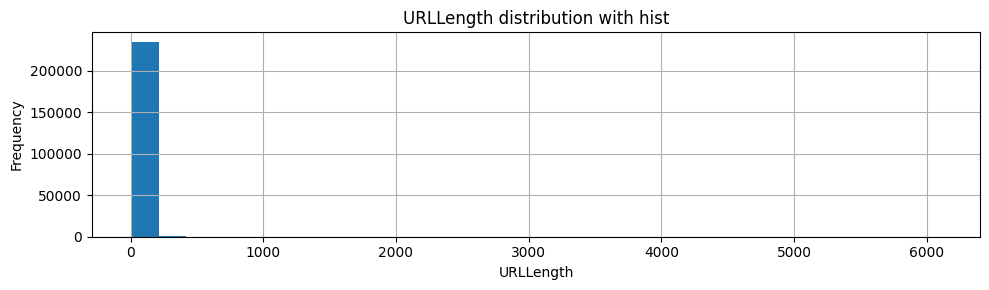

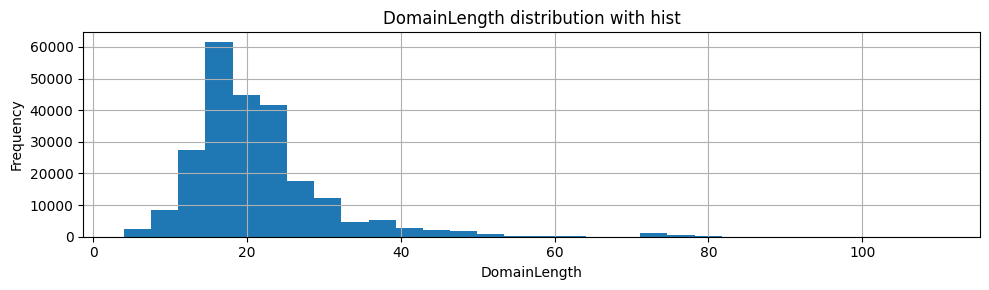

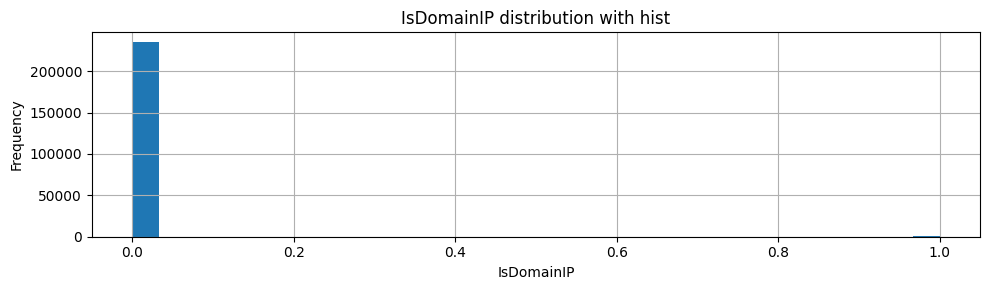

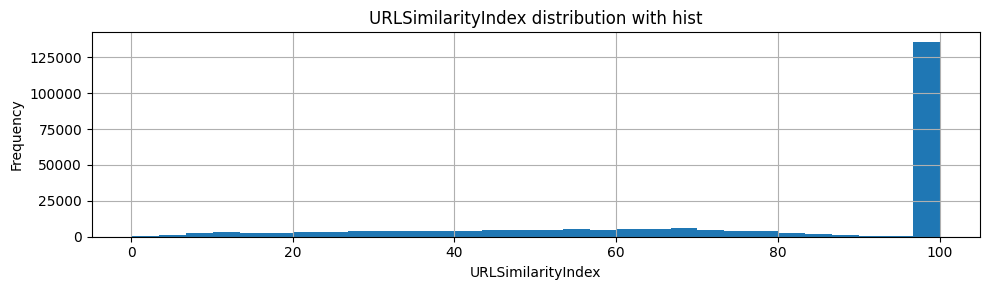

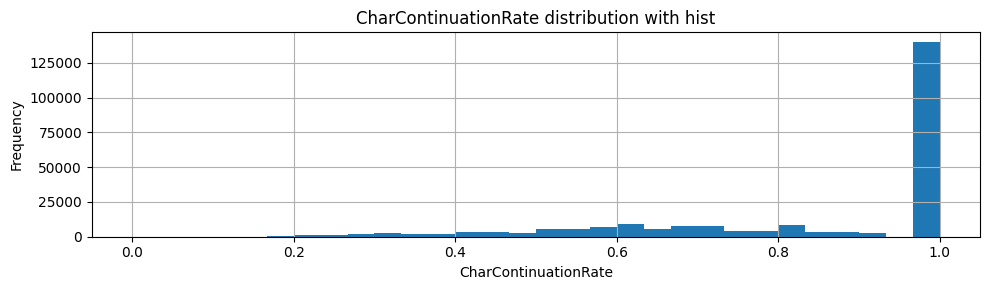

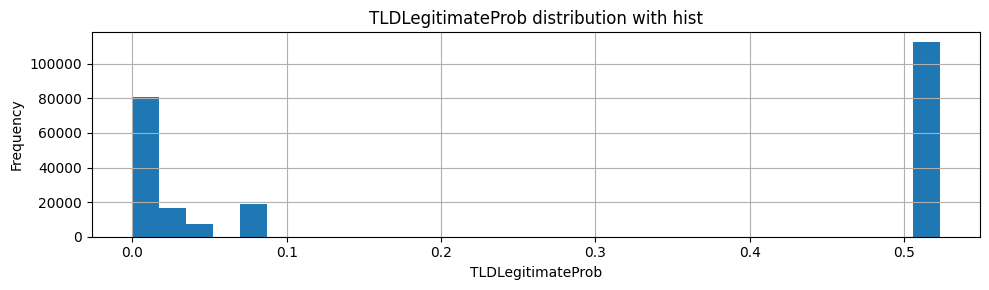

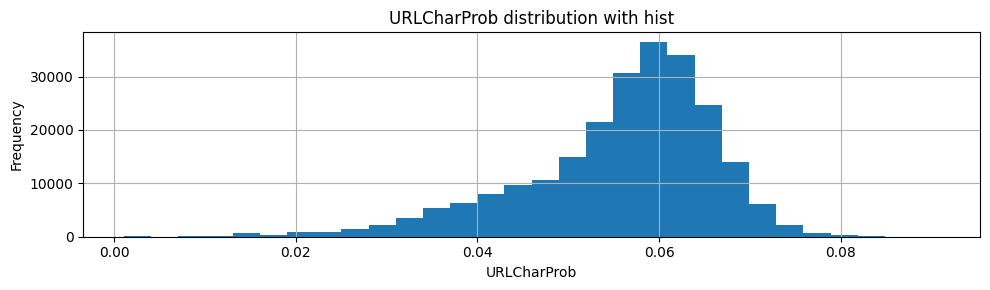

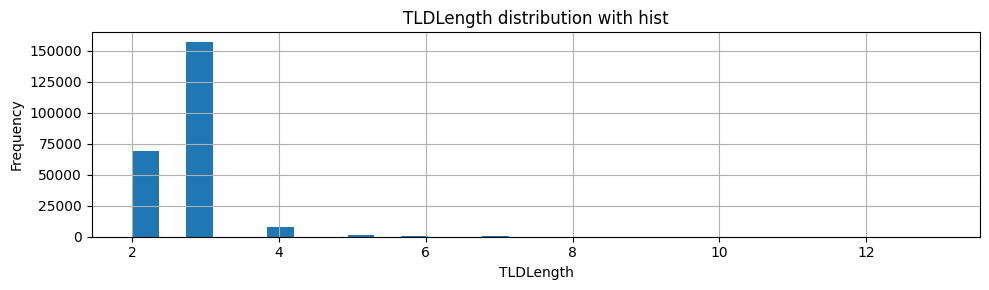

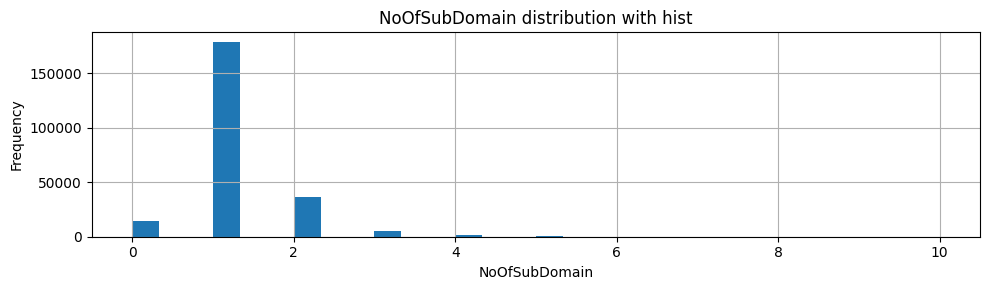

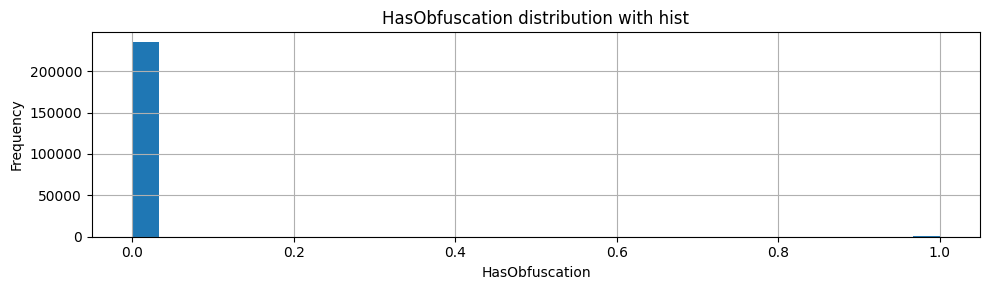

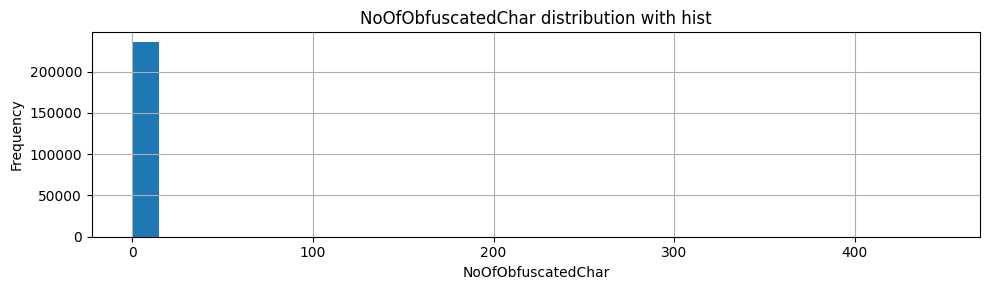

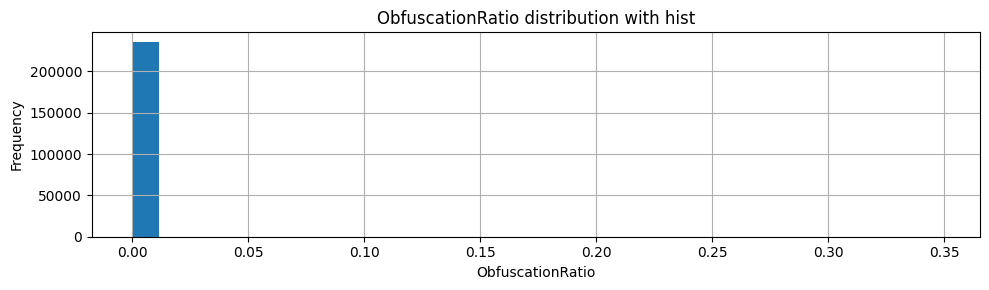

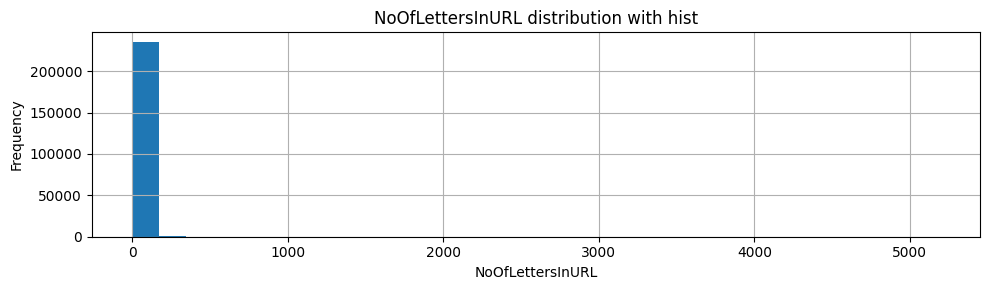

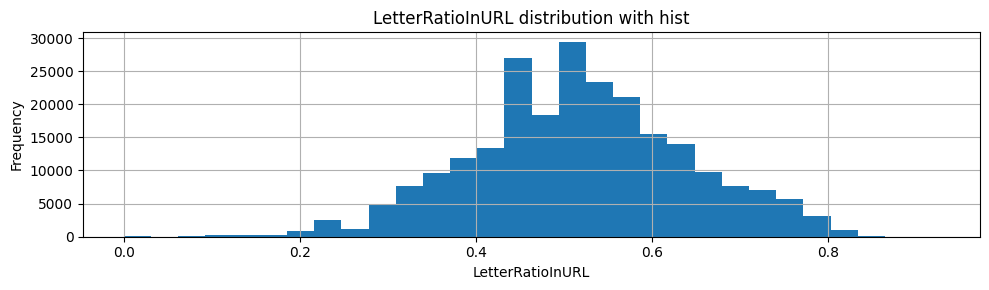

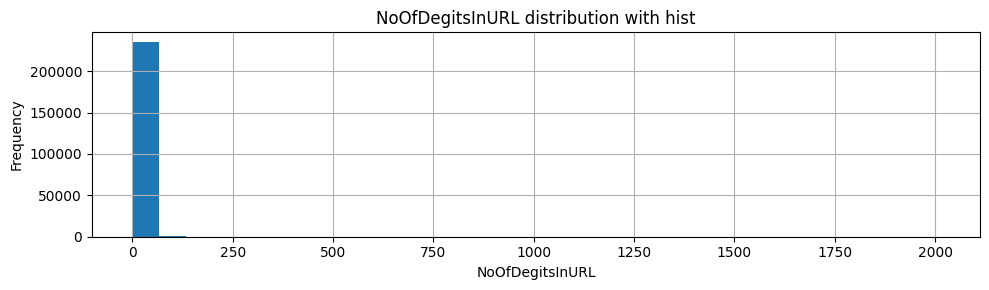

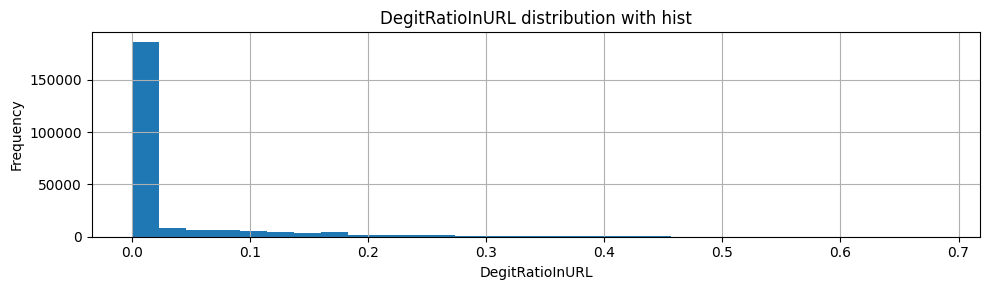

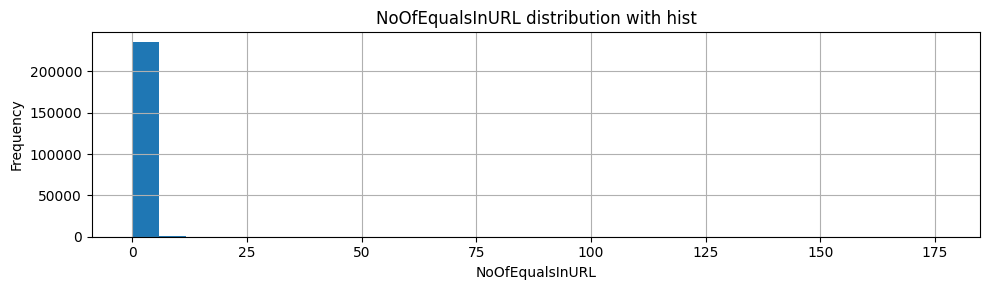

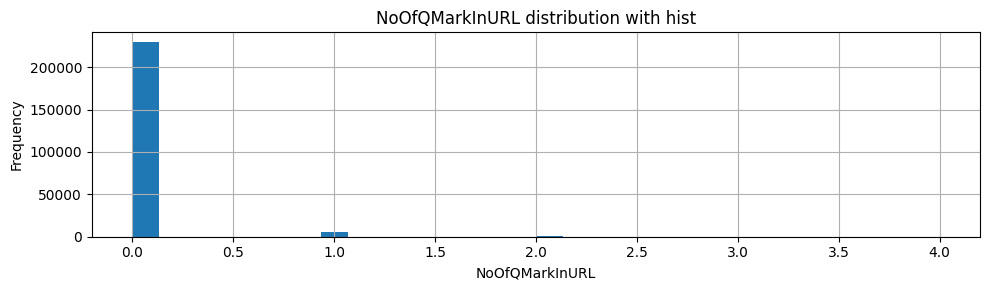

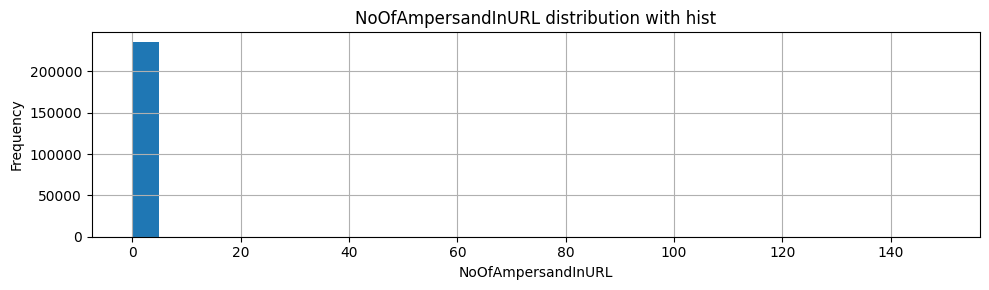

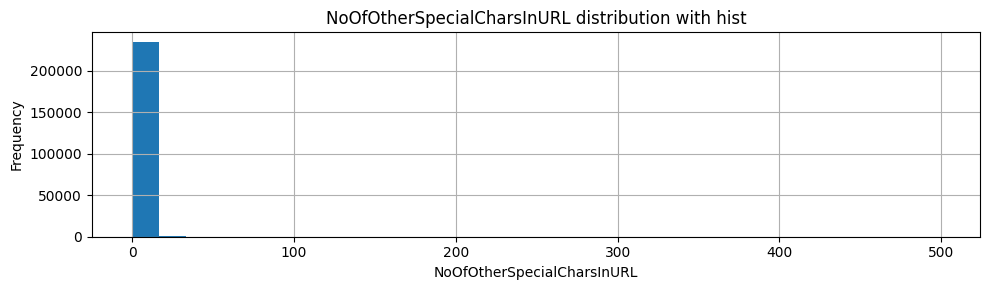

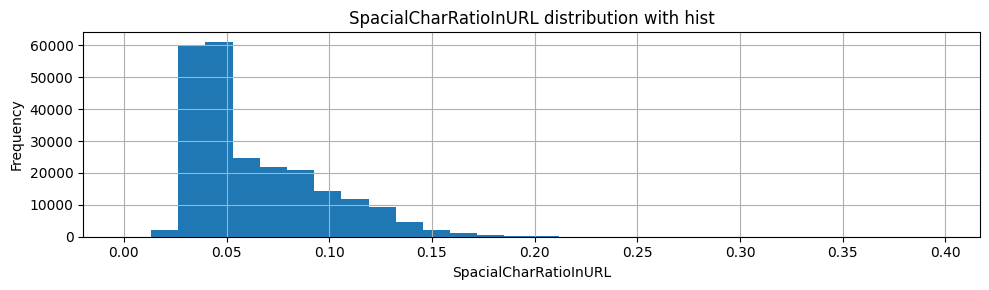

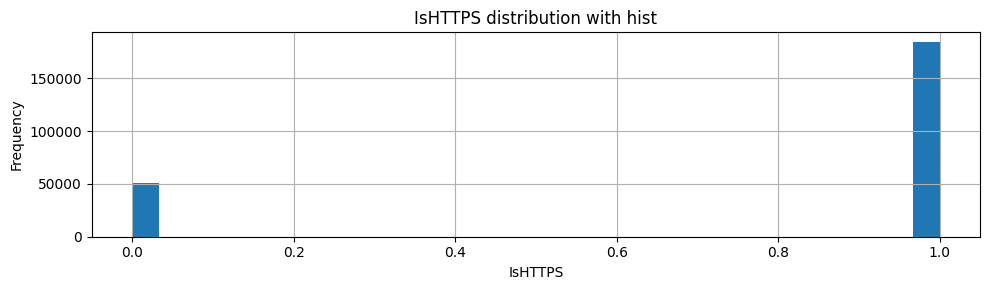

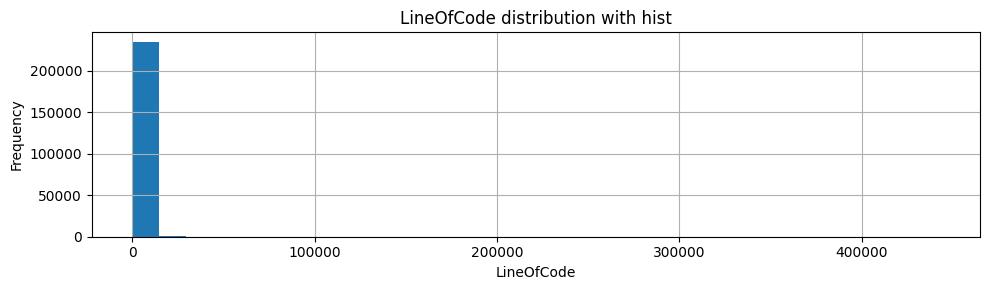

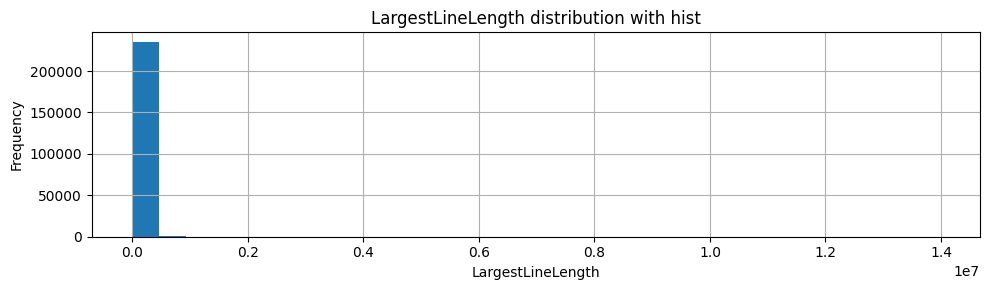

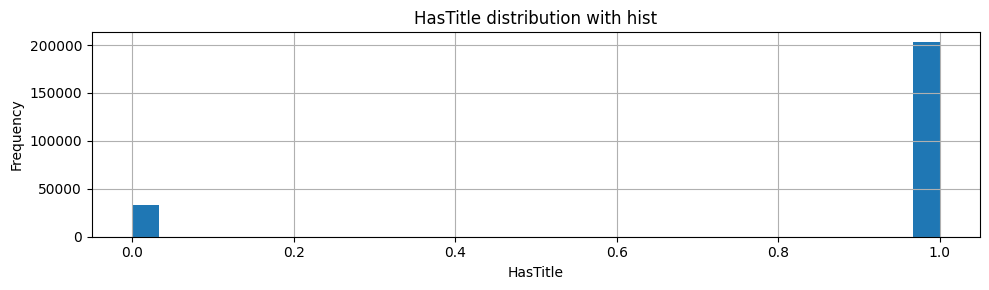

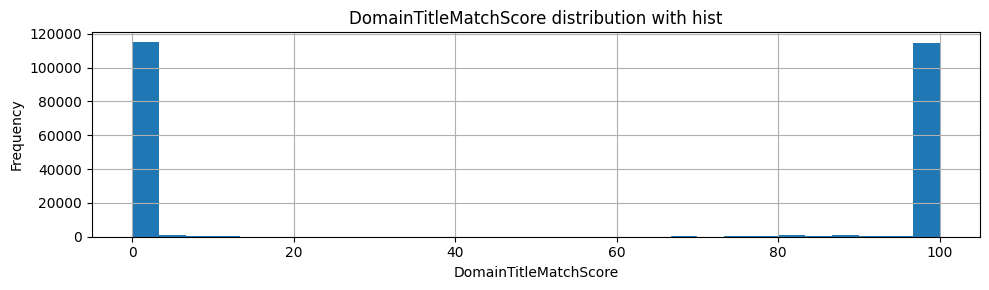

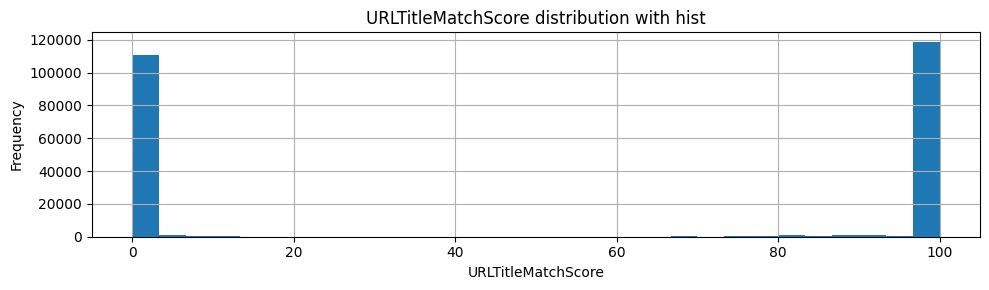

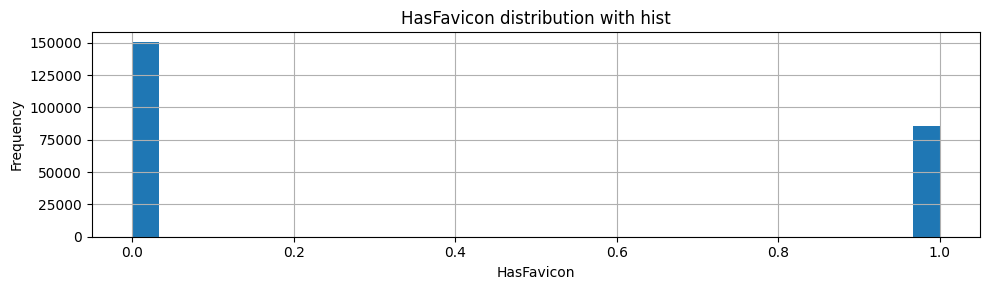

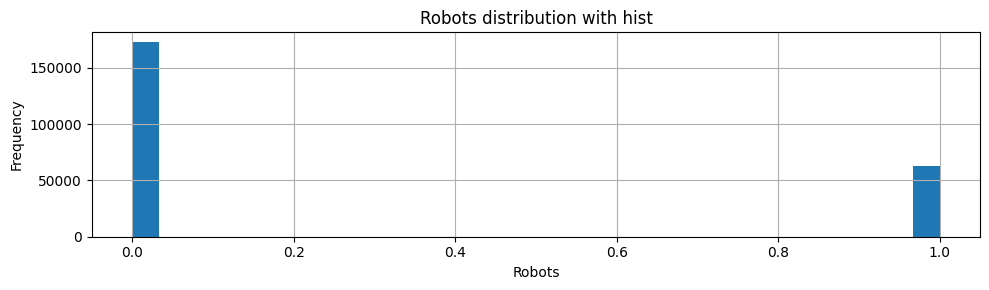

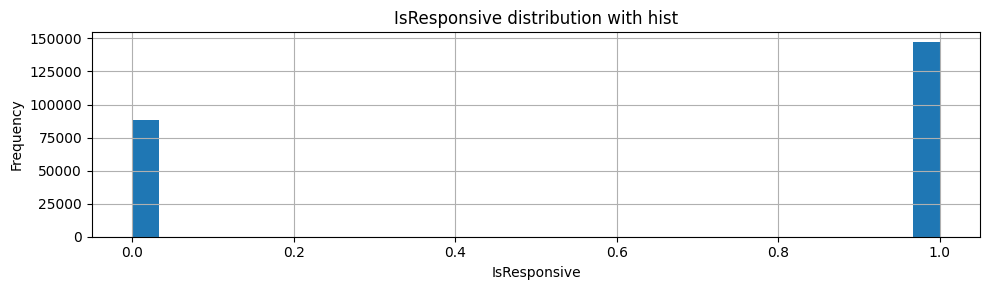

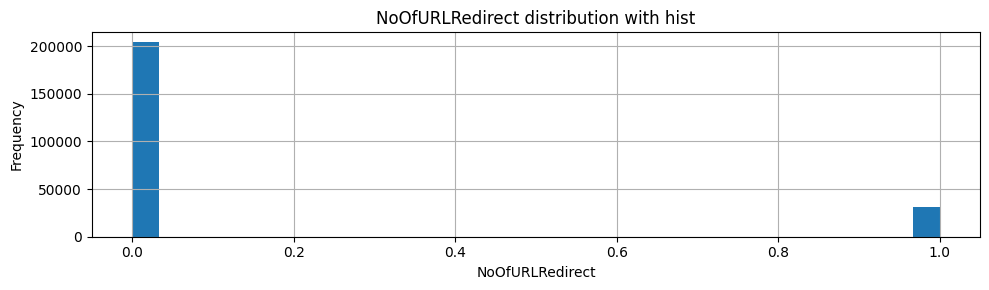

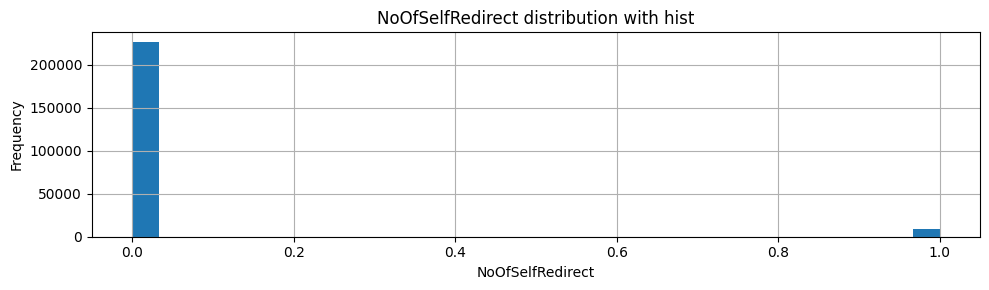

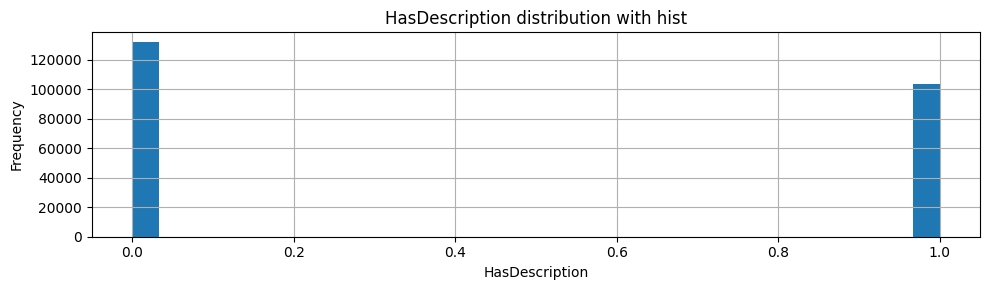

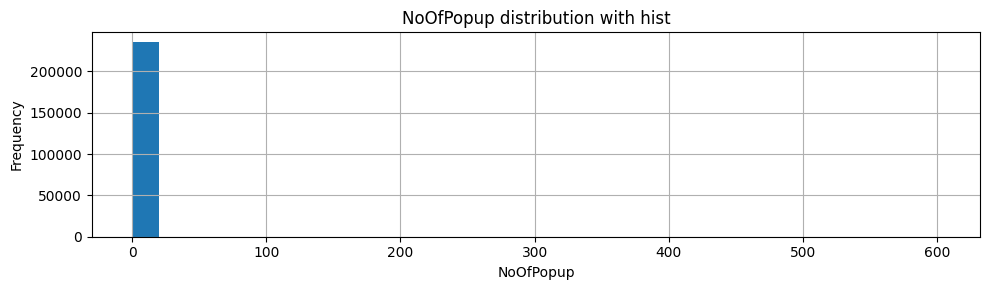

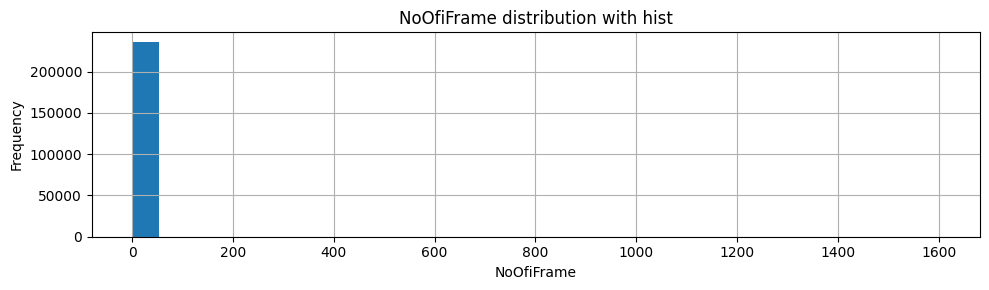

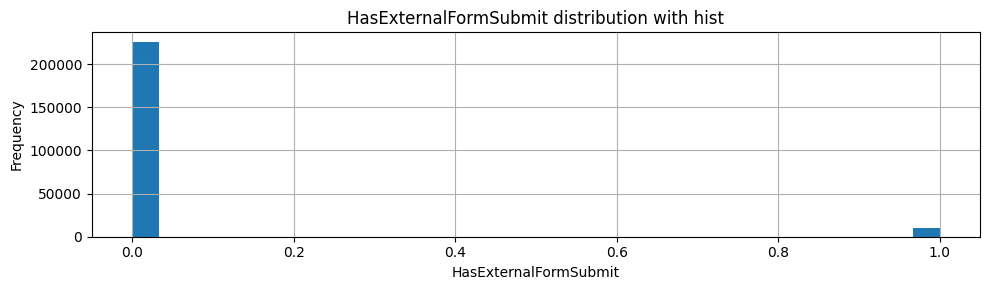

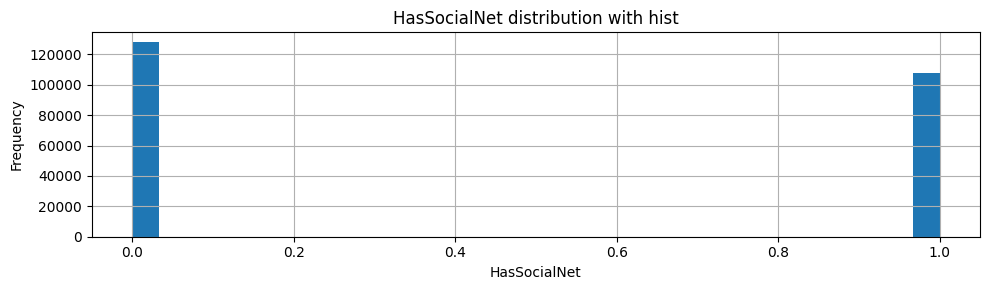

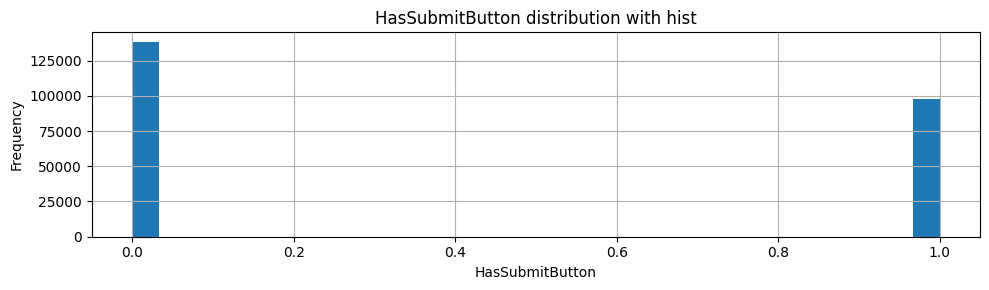

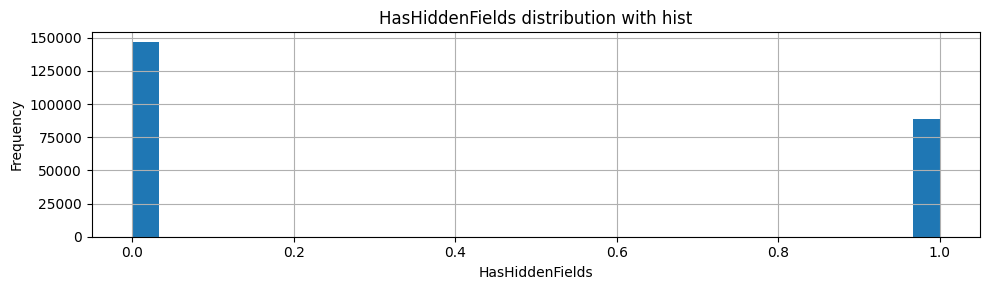

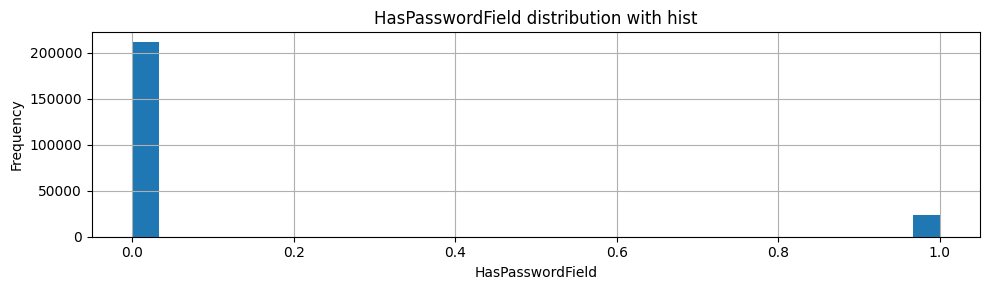

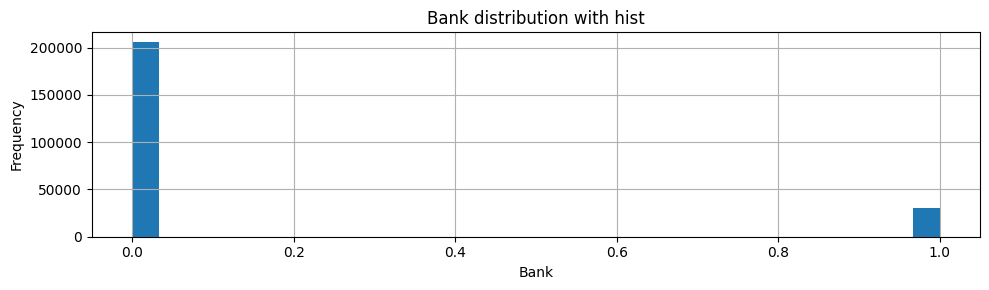

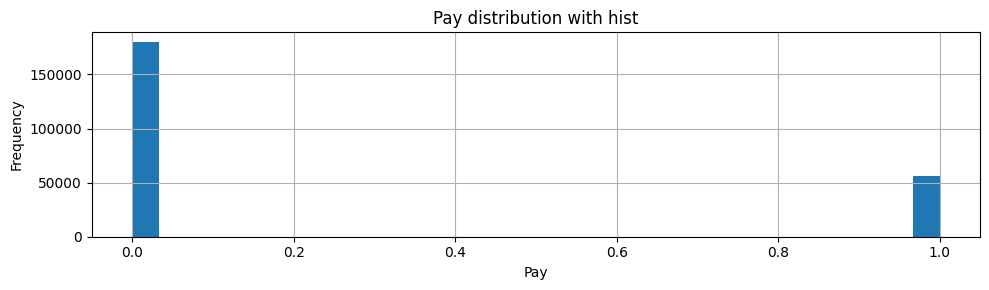

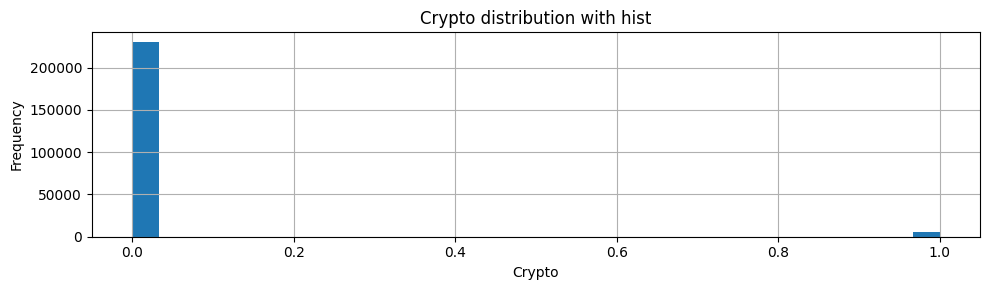

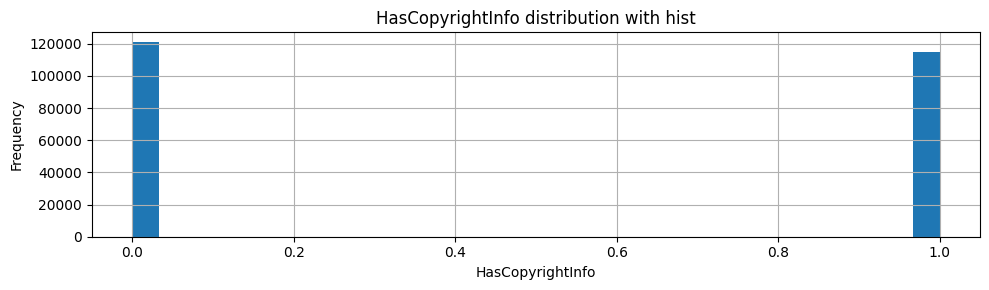

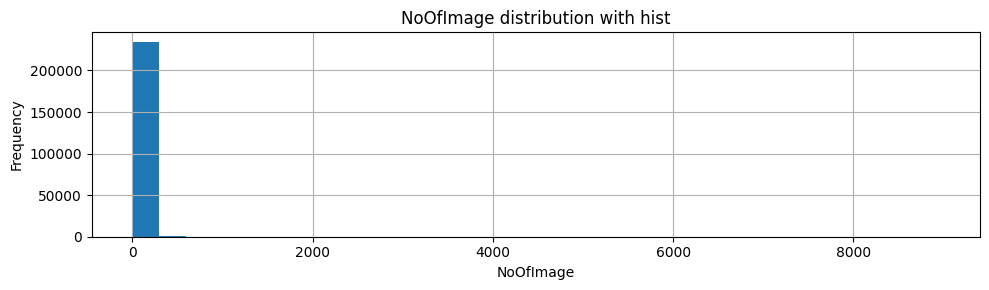

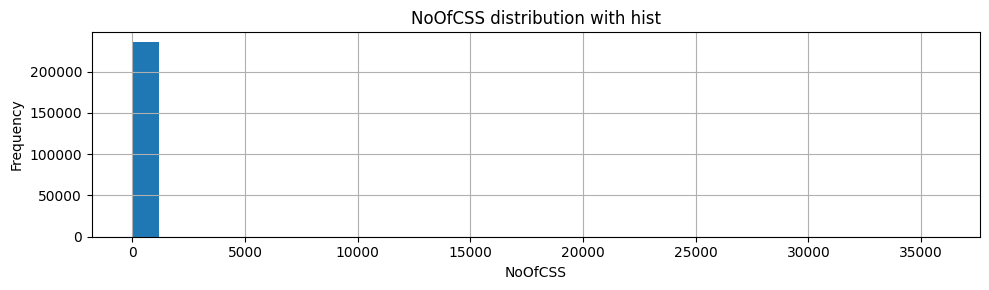

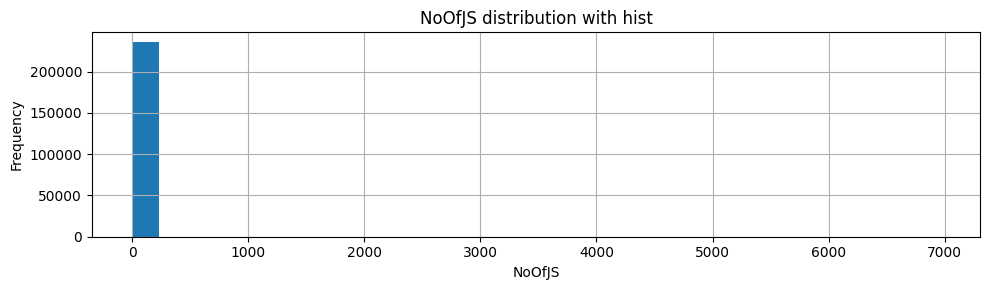

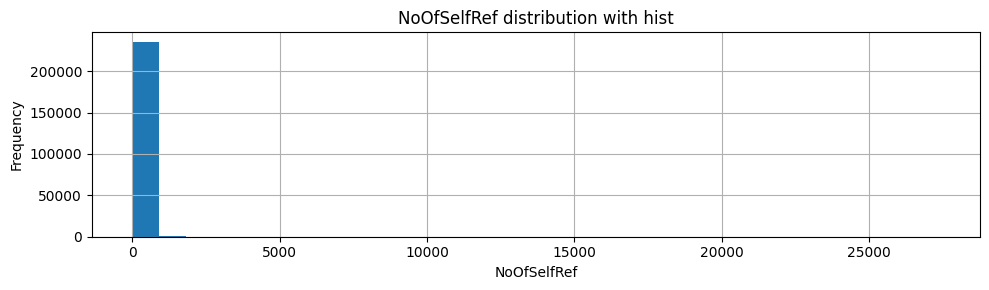

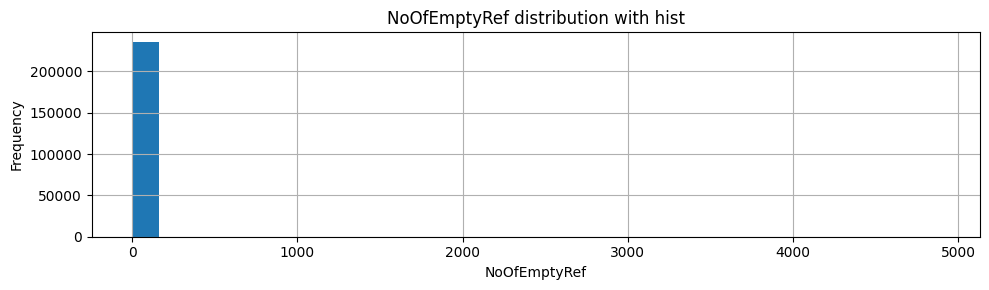

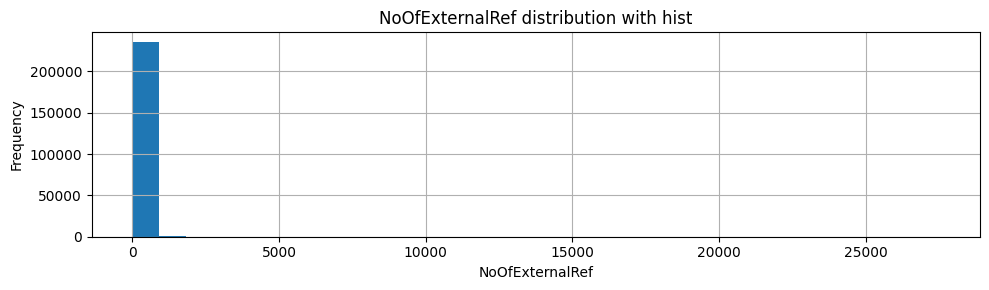

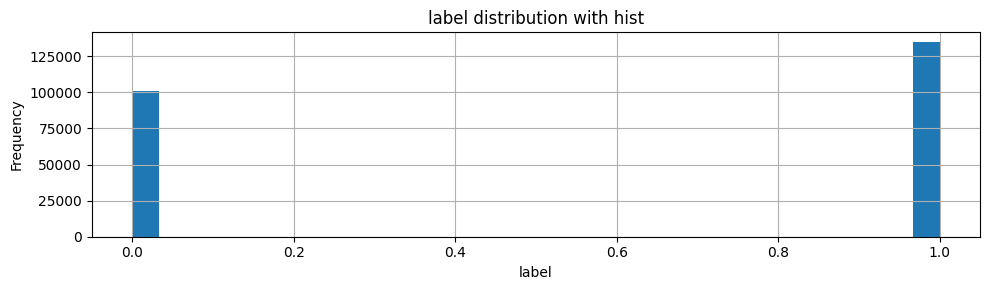

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/phishing_url_dataset/PhiUSIIL_Phishing_URL_Dataset.csv")

numeric_df = df.iloc[:, 1:].select_dtypes(include='number')

for column in numeric_df.columns:
    plt.figure(figsize=(10, 3))
    plt.hist(numeric_df[column].dropna(), bins=30)
    plt.title(f"{column} distribution with hist")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 2.1 - Missing Value

In [16]:
train_df.len = len(train_df)

In [17]:
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

In [18]:
train_df.isnull().sum()

,0
FILENAME,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0


## 2.2 - Save New Dataset

In [93]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/phishing_url_dataset/PhiUSIIL_Phishing_URL_Dataset.csv")


label_encoders = {}
converted_columns = []


for column in df.columns:
    if df[column].dtype == "object" and column != "label":
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le
        converted_columns.append(column)


df_cleaned = df.iloc[:, 1:]


df_cleaned.to_csv("PhiUSIIL_Phishing_new_data.csv", index=False)


print("Converted Columns:")
print(converted_columns)

print("\nNew Data Columns:")
print(df_cleaned.columns.tolist())


Converted Columns:
['FILENAME', 'URL', 'Domain', 'TLD', 'Title']

New Data Columns:
['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [94]:
df = pd.read_csv("/content/PhiUSIIL_Phishing_new_data.csv")

In [95]:
df.head(10)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,209013,31,187114,24,0,231,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,223747,23,204805,16,0,254,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,227579,29,209611,22,0,647,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,205082,26,182115,19,0,231,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,198761,33,173664,26,0,503,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
5,146024,30,107600,23,0,503,100.0,1.000000,0.079963,0.060614,...,0,0,1,35,1,11,86,0,14,1
6,201621,25,177115,18,0,231,100.0,1.000000,0.522907,0.063549,...,0,0,1,32,4,14,44,2,17,1
7,181341,25,151627,18,0,231,100.0,1.000000,0.522907,0.060486,...,0,0,1,24,2,22,36,0,15,1
8,153299,29,116740,22,0,368,100.0,1.000000,0.005084,0.056980,...,0,0,1,71,4,9,40,1,317,1
9,97961,18,46722,11,0,503,100.0,1.000000,0.079963,0.070497,...,0,0,1,10,1,12,173,6,65,1


In [96]:
df.tail(10)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235785,226730,32,208641,25,0,231,100.000000,1.000000,0.522907,0.055270,...,1,0,1,4,9,12,17,1,1,1
235786,119815,29,74280,22,0,503,100.000000,1.000000,0.079963,0.067248,...,0,0,1,2,7,15,30,7,3,1
235787,155654,34,119561,27,0,254,100.000000,0.550000,0.032650,0.058636,...,0,0,0,3,6,12,320,0,348,1
235788,161661,23,127220,16,0,231,100.000000,1.000000,0.522907,0.058494,...,1,0,1,21,3,22,31,0,8,1
235789,167485,30,134444,23,0,231,100.000000,0.533333,0.522907,0.065126,...,0,0,1,43,1,16,42,0,44,1
235790,207156,29,184798,22,0,231,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
235791,230522,28,213375,21,0,647,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
235792,183327,30,154095,23,0,157,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1
235793,85020,55,32135,47,0,258,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,0
235794,102027,33,51949,26,0,231,100.000000,1.000000,0.522907,0.060596,...,0,0,1,21,6,18,256,0,261,1


# 3 - Train/Test Split

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/PhiUSIIL_Phishing_new_data.csv")


X = df.drop(columns="label")
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nTrain Columns:")
print(X_train.columns.tolist())

X_train shape: (165056, 54)
X_test shape: (70739, 54)
y_train shape: (165056,)
y_test shape: (70739,)

Train Columns:
['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'No

# 4 - Desicion Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)


grid_search.fit(X_train, y_train)


print("\nBest Hyperparams:")
print(grid_search.best_params_)

best_dtree = grid_search.best_estimator_

y_pred = best_dtree.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Hyperparams:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



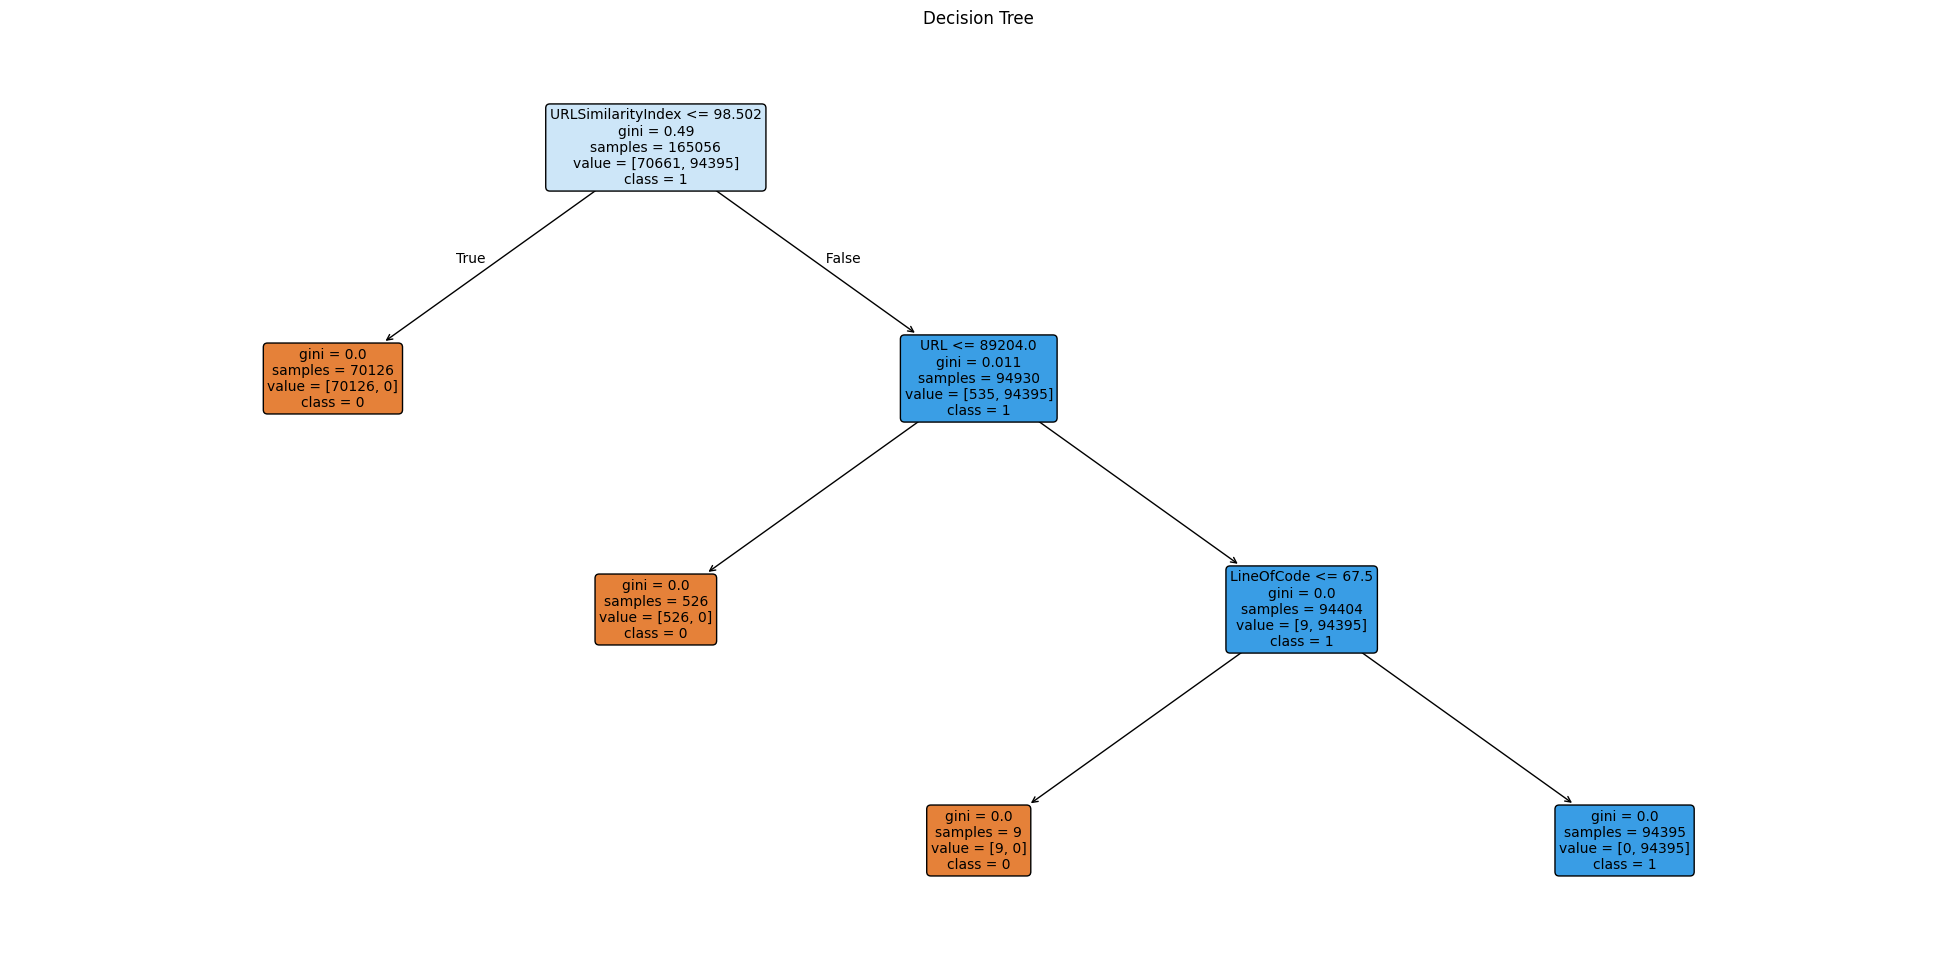

In [104]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))

plot_tree(
    tree_clf,
    filled=True,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in tree_clf.classes_],
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree")
plt.show()


In [105]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



# 5 - MLP Classifier

## 5.1 - MLP Classifier Model

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import time


if y_train.ndim == 1:
    y_train = to_categorical(y_train)
if y_test.ndim == 1:
    y_test = to_categorical(y_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [110]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [111]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,426 (60.26 KB)

 Trainable params: 15,426 (60.26 KB)

 Non-trainable params: 0 (0.00 B)

## 5.2 - MLP Model Training

In [114]:
start = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()

print(f"Training time: {int((end-start)//60)} min {int((end-start)%60)} sec")

Epoch 1/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9202 - loss: 0.3384 - val_accuracy: 0.9701 - val_loss: 0.1565
Epoch 2/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9386 - loss: 0.3439 - val_accuracy: 0.9594 - val_loss: 0.1523
Epoch 3/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9399 - loss: 0.3266 - val_accuracy: 0.9701 - val_loss: 0.1220
Epoch 4/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9598 - loss: 0.1706 - val_accuracy: 0.9814 - val_loss: 0.0875
Epoch 5/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9601 - loss: 0.1975 - val_accuracy: 0.9832 - val_loss: 0.0907
Epoch 6/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9454 - loss: 0.2402 - val_accuracy: 0.9810 - val_loss: 0.0939
Epoch 7/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9699 - loss: 0.1372 - val_accuracy: 0.9832 - val_loss: 0.0863
Epoch 8/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9591 - loss: 0.2030 

## 5.3 - Training Visualization

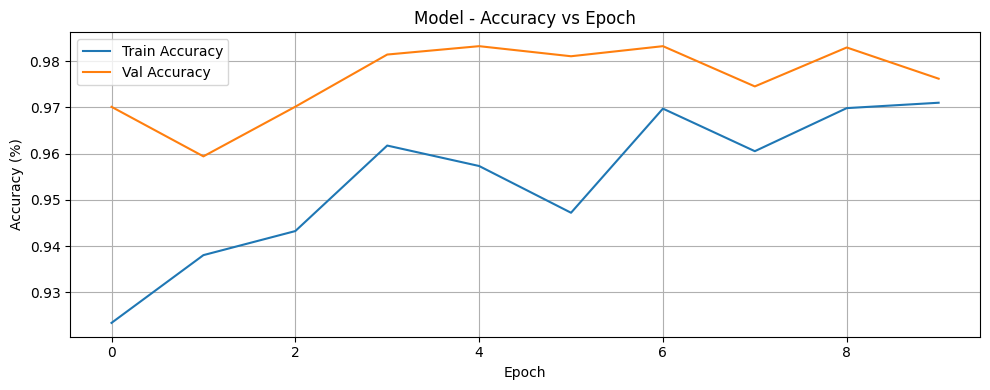

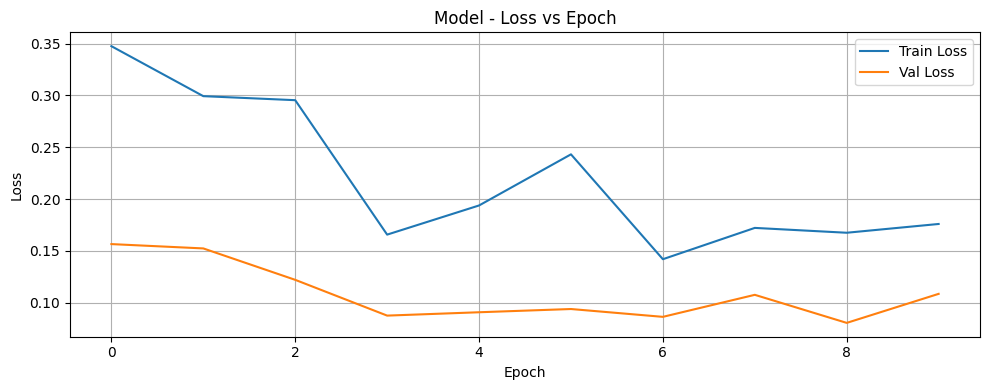

In [121]:
import matplotlib.pyplot as plt

train_losses = history.history['loss']
val_losses = history.history['val_loss']
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("Model - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Model - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.4 - MLP-PCA Classification Report and Confusion Matrix

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_labels))

2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     30284
           1       0.97      1.00      0.99     40455

    accuracy                           0.98     70739
   macro avg       0.99      0.98      0.98     70739
weighted avg       0.98      0.98      0.98     70739



2211/2211 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


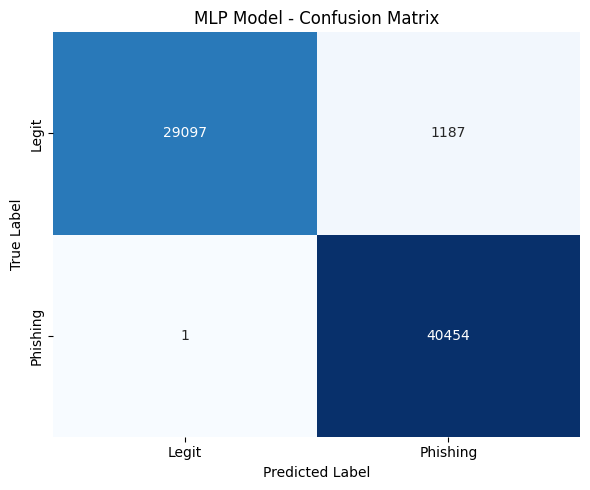

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_probs_full = model.predict(X_test)
y_pred_classes_full = np.argmax(y_pred_probs_full, axis=1)

y_true_full = np.argmax(y_test_cat, axis=1)


cm_full = confusion_matrix(y_true_full, y_pred_classes_full)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Legit", "Phishing"],
            yticklabels=["Legit", "Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("MLP Model - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6 - Models Compare

In [125]:
import pandas as pd


metrics_data = {
    "Model": ["Decision Tree", "MLPClassifier"],
    "Accuracy": [1.00, 0.9832],
    "Precision": [1.00, 0.981],
    "Recall": [1.00, 0.984],
    "F1-Score": [1.00, 0.982]
}

results_df = pd.DataFrame(metrics_data)

display(results_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.0000,1.000,1.000,1.000
1,MLPClassifier,0.9832,0.981,0.984,0.982


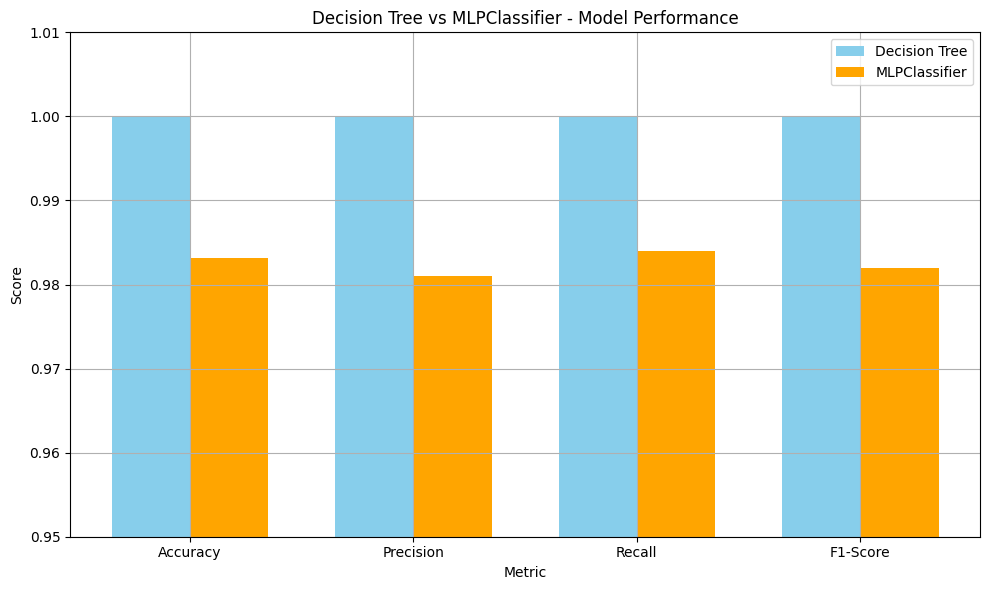

In [127]:
import matplotlib.pyplot as plt


labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
dt_scores = [1.00, 1.00, 1.00, 1.00]
mlp_scores = [0.9832, 0.981, 0.984, 0.982]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, dt_scores, width=width, label='Decision Tree', color='skyblue')
plt.bar([i + width for i in x], mlp_scores, width=width, label='MLPClassifier', color='orange')

# Etiketler
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Decision Tree vs MLPClassifier - Model Performance")
plt.xticks([i + width / 2 for i in x], labels)
plt.ylim(0.95, 1.01)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 7 - Apply Principal Component Analysi

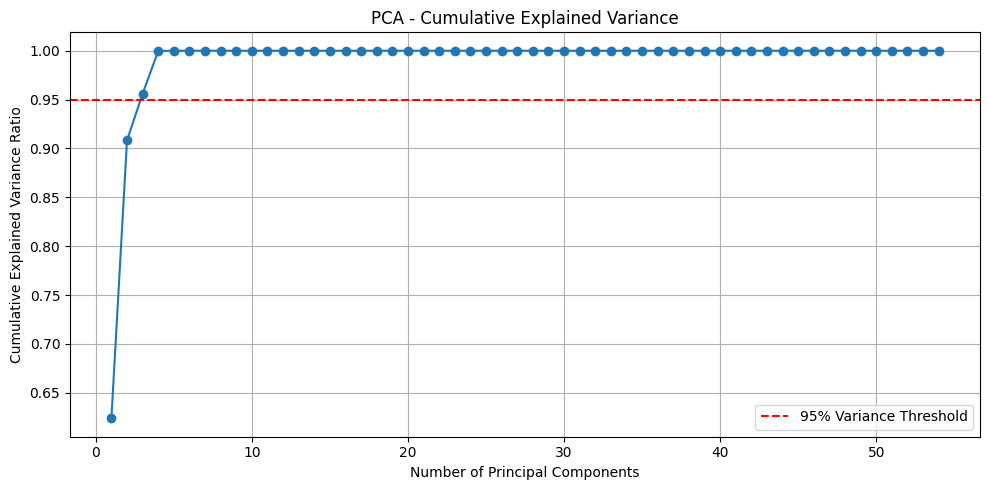

Number of components explaining ≥95% variance: 3


In [128]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA()
pca.fit(X_train)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title("PCA - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


n_components_95 = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
print(f"Number of components explaining ≥95% variance: {n_components_95}")

The graph obtained after applying PCA shows that 95% of the variance of the data can be explained by only the first 6 components. This shows that although the data is high-dimensional, the main information is concentrated in a small number of components. Therefore, it is possible to achieve similar performance with fewer components.

# 8 - MLP Classifier Model with PCA

## 8.1 - MLP-PCA Classifier Model

In [129]:
from sklearn.decomposition import PCA

# Define and apply PCA with 6 componentspca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

if y_train.ndim == 1:
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)
else:
    y_train_cat = y_train
    y_test_cat = y_test

model_pca = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [131]:
model_pca.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [132]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

## 8.2 - MLP-PCA Model Training

In [134]:
start = time.time()

history_pca = model_pca.fit(
    X_train_pca, y_train_cat,
    validation_data=(X_test_pca, y_test_cat),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()

print(f"Training time: {int((end-start)//60)} min {int((end-start)%60)} sec")

Epoch 1/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9518 - loss: 27.8966 - val_accuracy: 0.9639 - val_loss: 0.8336
Epoch 2/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9543 - loss: 3.1938 - val_accuracy: 0.9628 - val_loss: 0.1646
Epoch 3/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9582 - loss: 0.7858 - val_accuracy: 0.9601 - val_loss: 0.1421
Epoch 4/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9604 - loss: 0.4299 - val_accuracy: 0.9666 - val_loss: 0.1274
Epoch 5/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9613 - loss: 0.2197 - val_accuracy: 0.9746 - val_loss: 0.1080
Epoch 6/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9676 - loss: 0.1846 - val_accuracy: 0.9750 - val_loss: 0.1031
Epoch 7/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9687 - loss: 0.1800 - val_accuracy: 0.9697 - val_loss: 0.1203
Epoch 8/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9697 - loss: 0.162

## 8.3 - MLP-PCA Model Visualization

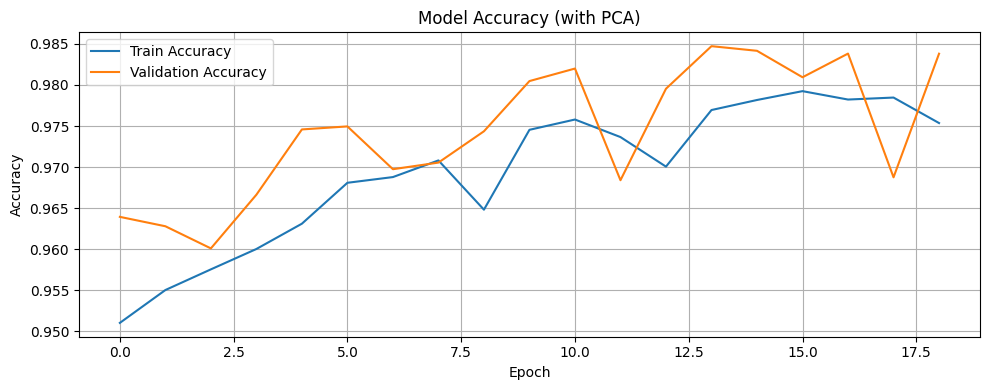

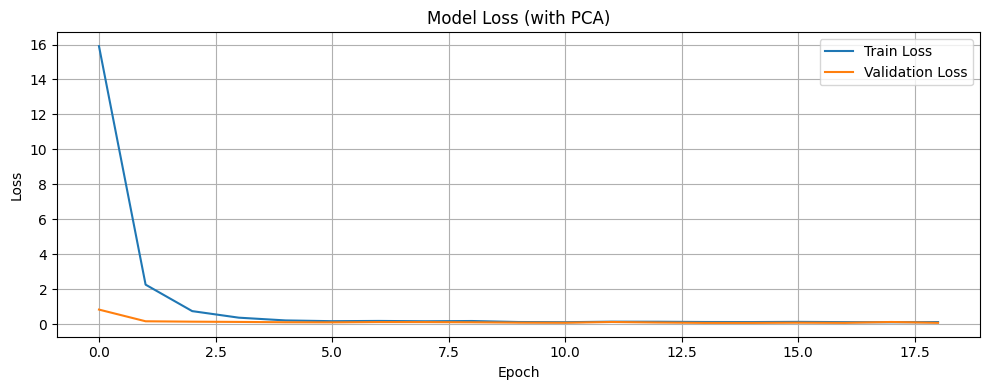

In [135]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history_pca.history['accuracy'], label='Train Accuracy')
plt.plot(history_pca.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (with PCA)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss
plt.figure(figsize=(10, 4))
plt.plot(history_pca.history['loss'], label='Train Loss')
plt.plot(history_pca.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (with PCA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 8.4 - MLP-PCA Classification Report and Confusion Matrix

In [142]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_pca.predict(X_test_pca)
y_pred_labels = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_labels))

2211/2211 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     30284
           1       0.97      1.00      0.99     40455

    accuracy                           0.98     70739
   macro avg       0.99      0.98      0.98     70739
weighted avg       0.99      0.98      0.98     70739



2211/2211 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


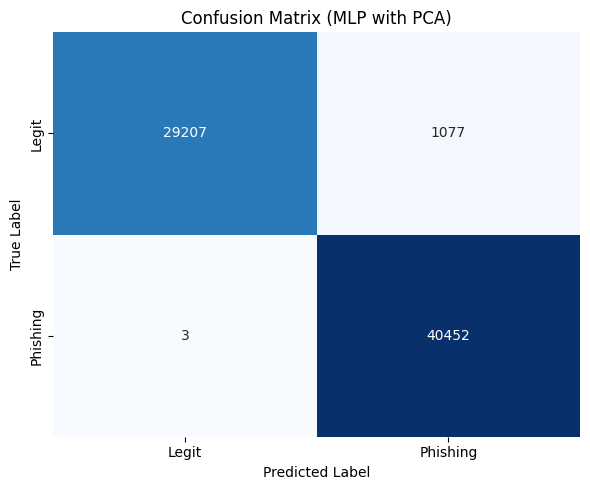

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_probs = model_pca.predict(X_test_pca)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


y_true = np.argmax(y_test_cat, axis=1)


cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Legit", "Phishing"],
            yticklabels=["Legit", "Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (MLP with PCA)")
plt.tight_layout()
plt.show()

# 9 - MLP and MLP-PCA Models Compare

In [145]:
# MLP
y_pred_probs = model.predict(X_test)
y_pred_labels = y_pred_probs.argmax(axis=1)
y_true_labels = y_test_cat.argmax(axis=1)

# MLP-PCA
y_pred_pca_probs = model_pca.predict(X_test_pca)
y_pred_pca_labels = y_pred_pca_probs.argmax(axis=1)
y_true_pca_labels = y_test_cat.argmax(axis=1)

2211/2211 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# MLP
acc_mlp = accuracy_score(y_true_labels, y_pred_labels)
prec_mlp = precision_score(y_true_labels, y_pred_labels)
recall_mlp = recall_score(y_true_labels, y_pred_labels)
f1_mlp = f1_score(y_true_labels, y_pred_labels)

# MLP-PCA
acc_pca = accuracy_score(y_true_pca_labels, y_pred_pca_labels)
prec_pca = precision_score(y_true_pca_labels, y_pred_pca_labels)
recall_pca = recall_score(y_true_pca_labels, y_pred_pca_labels)
f1_pca = f1_score(y_true_pca_labels, y_pred_pca_labels)

In [148]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": ["MLP", "MLP-PCA"],
    "Accuracy": [acc_mlp, acc_pca],
    "Precision": [prec_mlp, prec_pca],
    "Recall": [recall_mlp, recall_pca],
    "F1-Score": [f1_mlp, f1_pca]
})

print("MLP vs MLP-PCA")
display(results_df)


MLP vs MLP-PCA


,Model,Accuracy,Precision,Recall,F1-Score
0,MLP,0.983206,0.971494,0.999975,0.985529
1,MLP-PCA,0.984733,0.974066,0.999926,0.986827


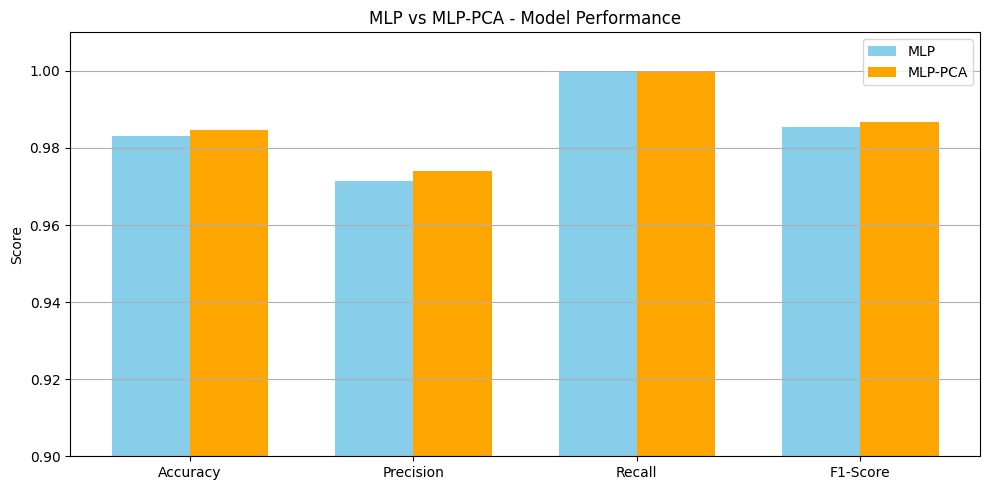

In [150]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
mlp_scores = [acc_mlp, prec_mlp, recall_mlp, f1_mlp]
pca_scores = [acc_pca, prec_pca, recall_pca, f1_pca]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x, mlp_scores, width=width, label="MLP", color='skyblue')
plt.bar([i + width for i in x], pca_scores, width=width, label="MLP-PCA", color='orange')

plt.xticks([i + width/2 for i in x], metrics)
plt.ylim(0.9, 1.01)
plt.title("MLP vs MLP-PCA - Model Performance")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The MLP model created with only 6 components by applying PCA achieved similar or even slightly higher accuracy, precision and f1-score values ​​than the full-size model. This shows that although PCA significantly reduces the data size, it does not cause any loss of information, on the contrary, it makes the model more compact and effective.

# 10 - Features Selection - Correlation Features Selection Method

2 features dropped due to correlation > 0.9:
['NoOfLettersInURL', 'URLTitleMatchScore']


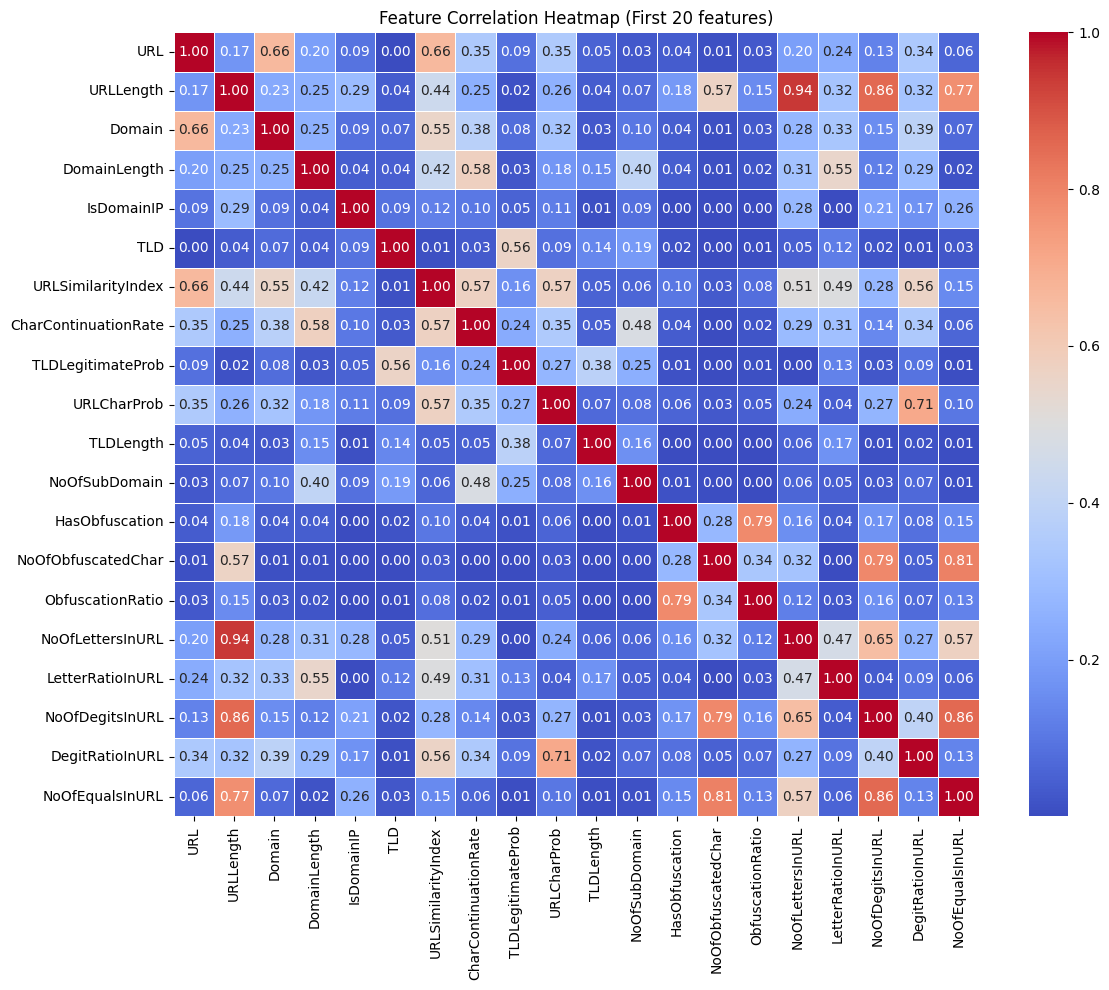

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Correlation Matrix
corr_matrix = X_train.corr().abs()

#2. Take the upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#3. Identify high-detail columns
threshold = 0.90
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"{len(to_drop)} features dropped due to correlation > {threshold}:")
print(to_drop)


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.iloc[:20, :20], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (First 20 features)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [154]:
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                   for col1 in upper.columns
                   for col2 in upper.columns
                   if col1 != col2 and corr_matrix.loc[col1, col2] > threshold]

print("\nHighly correlated pairs (> 0.90):")
for col1, col2, corr in high_corr_pairs[:10]:
    print(f"{col1} - {col2}: {corr:.2f}")



Highly correlated pairs (> 0.90):
URLLength - NoOfLettersInURL: 0.94
NoOfLettersInURL - URLLength: 0.94
DomainTitleMatchScore - URLTitleMatchScore: 0.96
URLTitleMatchScore - DomainTitleMatchScore: 0.96


In [155]:
low_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                  for col1 in upper.columns
                  for col2 in upper.columns
                  if col1 != col2 and corr_matrix.loc[col1, col2] < 0.05]

# İlk 10 tanesini yazdıralım
print("\nWeakly correlated pairs (< 0.05):")
for col1, col2, corr in low_corr_pairs[:10]:
    print(f"{col1} - {col2}: {corr:.2f}")



Weakly correlated pairs (< 0.05):
URL - TLD: 0.00
URL - NoOfSubDomain: 0.03
URL - HasObfuscation: 0.04
URL - NoOfObfuscatedChar: 0.01
URL - ObfuscationRatio: 0.03
URL - NoOfAmpersandInURL: 0.03
URL - LargestLineLength: 0.03
URL - NoOfURLRedirect: 0.03
URL - NoOfPopup: 0.04
URL - NoOfCSS: 0.05


Among the attribute pairs that showed high correlation, the attributes that carried more general or meaningful information were preferred. For example, NoOfLettersInURL was removed because it had a high correlation with URLLength; URLLength was kept because it was more comprehensive. Similarly, DomainTitleMatchScore was kept instead of URLTitleMatchScore because it could be more explanatory in phishing URL analysis.

## 10.1 - MLP Models with Correlation Features Selection

In [156]:
dropped_features = ['NoOfLettersInURL', 'URLTitleMatchScore']
X_train_clean = X_train.drop(columns=dropped_features)
X_test_clean = X_test.drop(columns=dropped_features)

## 10.2 - MLP Models with Correlation

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score
import time


if y_train.ndim == 1:
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)
else:
    y_train_cat = y_train
    y_test_cat = y_test


model_corr_filtered = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_clean.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
model_corr_filtered.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [159]:
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5,
                           restore_best_weights=True)

## 10.3 - MLP Models Training with Correlation

In [166]:
start = time.time()

model_corr_filtered.fit(
    X_train_clean, y_train_cat,
    validation_data=(X_test_clean, y_test_cat),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()

print(f"Training time: {int((end-start)//60)} min {int((end-start)%60)} sec")

Epoch 1/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9716 - loss: 0.1613 - val_accuracy: 0.9840 - val_loss: 0.0783
Epoch 2/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9758 - loss: 0.1089 - val_accuracy: 0.9848 - val_loss: 0.0845
Epoch 3/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9752 - loss: 0.1247 - val_accuracy: 0.9760 - val_loss: 0.1051
Epoch 4/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9741 - loss: 0.1234 - val_accuracy: 0.9756 - val_loss: 0.1020
Epoch 5/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9755 - loss: 0.1280 - val_accuracy: 0.9840 - val_loss: 0.0938
Epoch 6/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9763 - loss: 0.1289 - val_accuracy: 0.9848 - val_loss: 0.0789
Epoch 7/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9775 - loss: 0.1256 - val_accuracy: 0.9840 - val_loss: 0.0747
Training time: 0 min 56 sec


## 10.4 MLP Models with Correlation Visualization

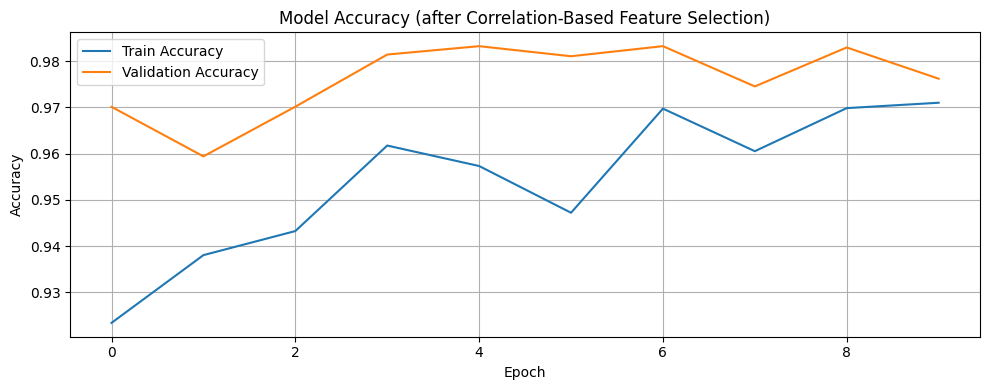

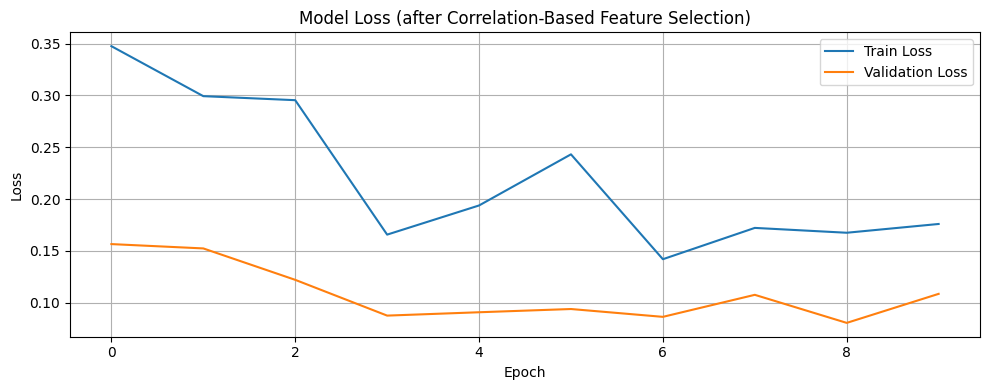

In [169]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (after Correlation-Based Feature Selection)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (after Correlation-Based Feature Selection)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [172]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred =  model_corr_filtered.predict(X_test_clean)
y_pred_labels = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_labels))

2211/2211 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     30284
           1       0.97      1.00      0.99     40455

    accuracy                           0.98     70739
   macro avg       0.99      0.98      0.98     70739
weighted avg       0.99      0.98      0.98     70739



## 10.5 MLP Models with Correlation Confusion Matrix

2211/2211 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step


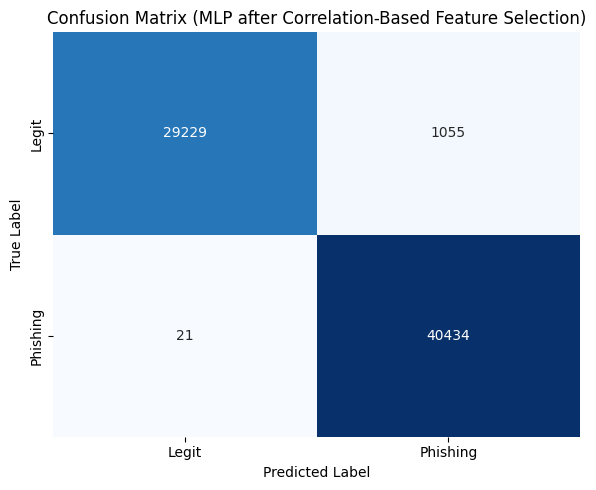

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


y_pred_probs = model_corr_filtered.predict(X_test_clean)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legit', 'Phishing'],
            yticklabels=['Legit', 'Phishing'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (MLP after Correlation-Based Feature Selection)")
plt.tight_layout()
plt.show()


# 11 - Features Selection - Information Gain (Mutual Information) Method

## 11.1 - Information Gain (Mutual Information) Method

In [175]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# 1. Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Label
y_train_1d = y_train_cat.argmax(axis=1) if y_train_cat.ndim == 2 else y_train

# 3. Chose top 10 features
k = 10
selector_ig = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_ig = selector_ig.fit_transform(X_train_scaled, y_train_1d)
X_test_ig = selector_ig.transform(X_test_scaled)


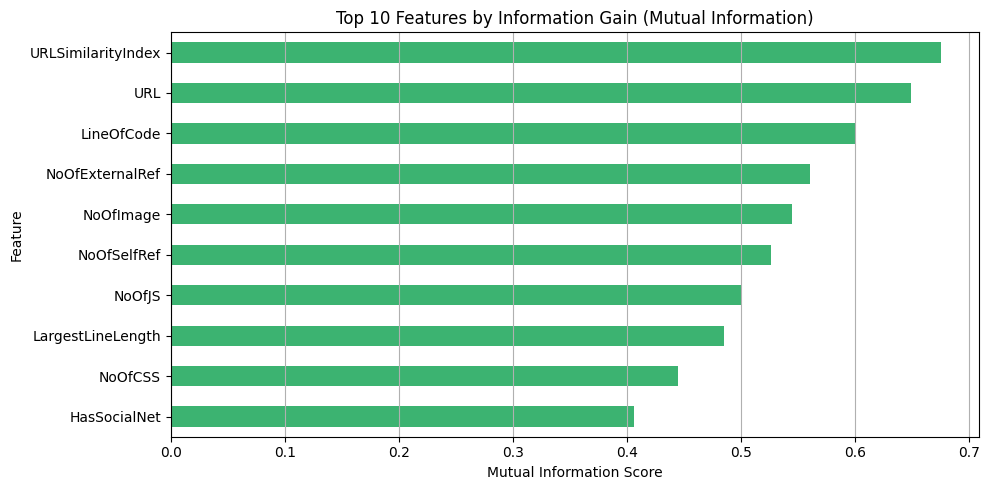

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

mi_scores = pd.Series(selector_ig.scores_, index=X_train.columns)

selected_mask = selector_ig.get_support()
selected_scores = mi_scores[selected_mask]

plt.figure(figsize=(10, 5))
selected_scores.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 Features by Information Gain (Mutual Information)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

According to Mutual Information analysis, the attributes that explain the class information the most are related to URL structure and page content. Especially structural attributes such as URLSimilarityIndex and URL are of great importance in phishing detection. This analysis enables the model to be trained with the most meaningful data, thus enabling more effective results to be obtained.

## 11.2 - MLP Models with Information Gain Features Selection Method

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time


model_ig = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ig.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
model_ig.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [181]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

## 11.3 - MLP Models Training with Information Gain Features Selection Method

In [182]:
start = time.time()

history_ig = model_ig.fit(
    X_train_ig, y_train_cat,
    validation_data=(X_test_ig, y_test_cat),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()

print(f"Training time: {int((end-start)//60)} min {int((end-start)%60)} sec")

Epoch 1/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9501 - loss: 0.1035 - val_accuracy: 0.9994 - val_loss: 0.0018
Epoch 2/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 3/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 4/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9998 - loss: 9.6302e-04 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 5/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 6/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9999 - loss: 8.6673e-04 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 7/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9998 - loss: 8.5098e-04 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 8/50
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9998 

## 11.4 - MLP Models with Information Gain Visualization

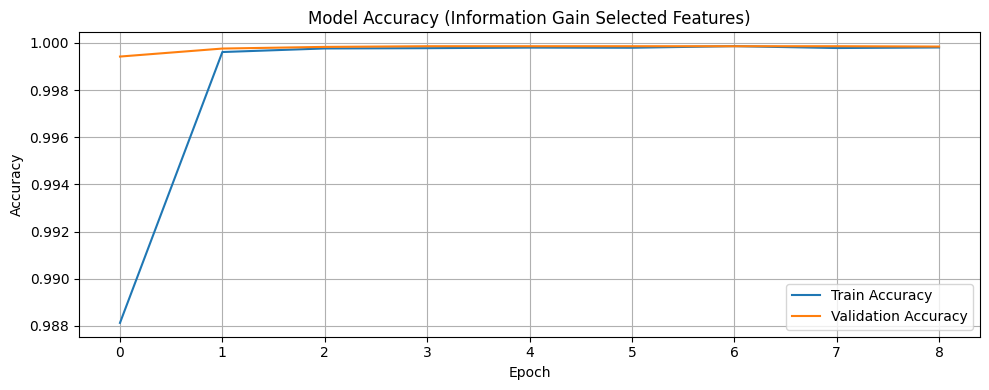

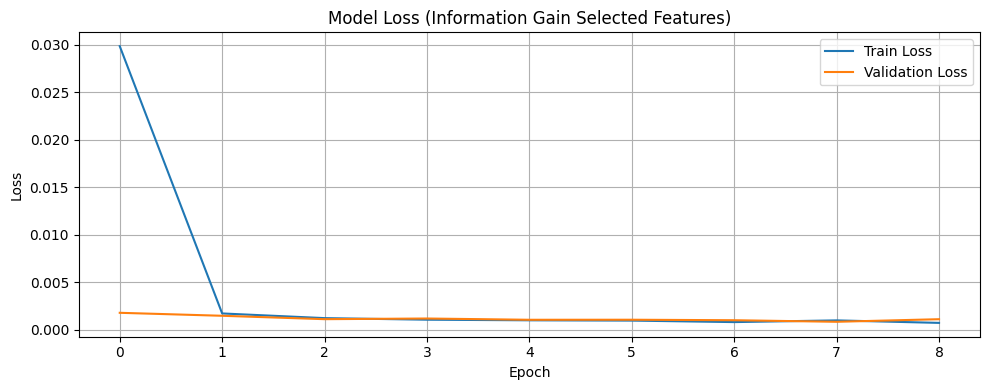

In [183]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history_ig.history['accuracy'], label='Train Accuracy')
plt.plot(history_ig.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Information Gain Selected Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss
plt.figure(figsize=(10, 4))
plt.plot(history_ig.history['loss'], label='Train Loss')
plt.plot(history_ig.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Information Gain Selected Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [187]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred =  model_ig(X_test_ig)
y_pred_labels = np.argmax(y_pred, axis=1) # Convert EagerTensor to numpy array
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



## 11.5 MLP Models with IG Confusion Matrix

2211/2211 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


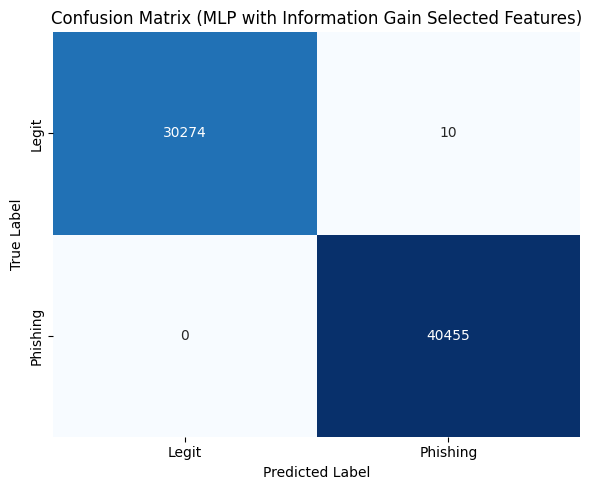

In [185]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


y_pred_probs_ig = model_ig.predict(X_test_ig)
y_pred_labels_ig = np.argmax(y_pred_probs_ig, axis=1)


y_true_labels = np.argmax(y_test_cat, axis=1)

# 3. Confusion Matrix
cm_ig = confusion_matrix(y_true_labels, y_pred_labels_ig)


plt.figure(figsize=(6, 5))
sns.heatmap(cm_ig, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Legit", "Phishing"],
            yticklabels=["Legit", "Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (MLP with Information Gain Selected Features)")
plt.tight_layout()
plt.show()


# 12 - Compare ALL MLP Models

In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

y_true = y_test_cat.argmax(axis=1)

def get_scores(model, X, name):
    y_pred = model.predict(X).argmax(axis=1)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

model_scores = [
    get_scores(model, X_test, "MLP (All)"),
    get_scores(model_pca, X_test_pca, "MLP + PCA"),
    get_scores(model_corr_filtered, X_test_clean, "MLP + Corr"),
    get_scores(model_ig, X_test_ig, "MLP + IG")
]

results_df = pd.DataFrame(model_scores)


print("All Models")
display(results_df)


2211/2211 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
All Models


,Model,Accuracy,Precision,Recall,F1-Score
0,MLP (All),0.983206,0.971494,0.999975,0.985529
1,MLP + PCA,0.984733,0.974066,0.999926,0.986827
2,MLP + Corr,0.984789,0.974572,0.999481,0.986869
3,MLP + IG,0.999859,0.999753,1.000000,0.999876


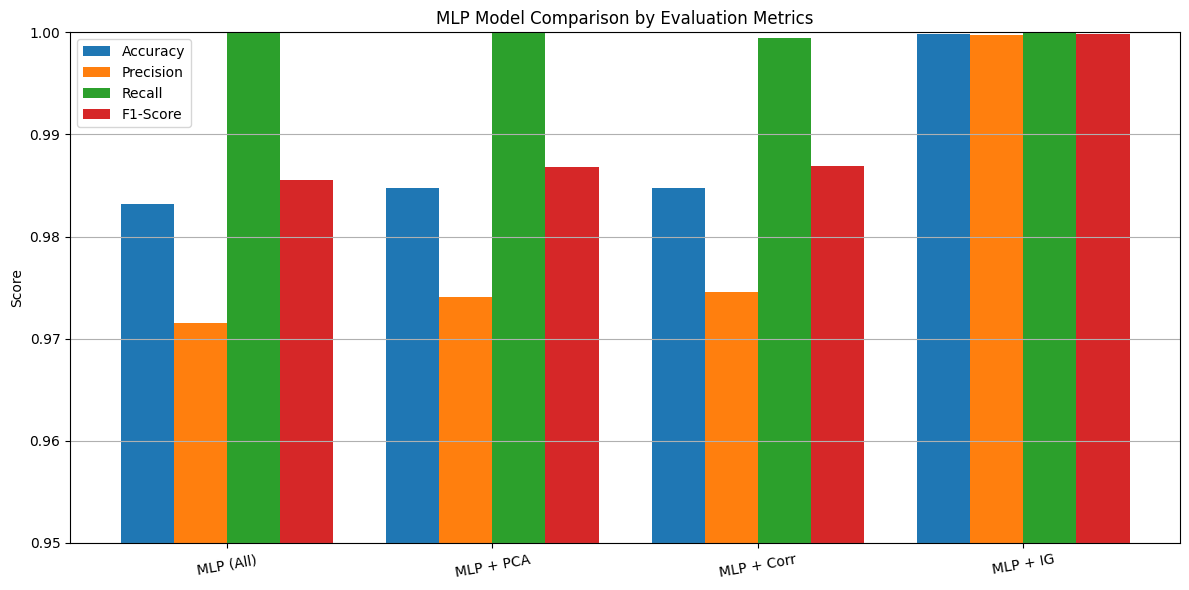

In [194]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(results_df["Model"]))
width = 0.2

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df[metric], width=width, label=metric)

plt.xticks(x + width * 1.5, results_df["Model"], rotation=10)
plt.ylabel("Score")
plt.title("MLP Model Comparison by Evaluation Metrics")
plt.ylim(0.95, 1.0)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
